# The Spark Foundation - GRIP - Data Science & Business Analytics
# January 2022
# Task(1) : Prediction Using Supervised ML
# NAME : Ahmed Emara

In [42]:
URL = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

## Importing Modules

In [5]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Read the data

In [43]:
df = pd.read_csv(URL)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [44]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Looking at the correlaton :
* too see how the independent variable is associating with the dependent variable


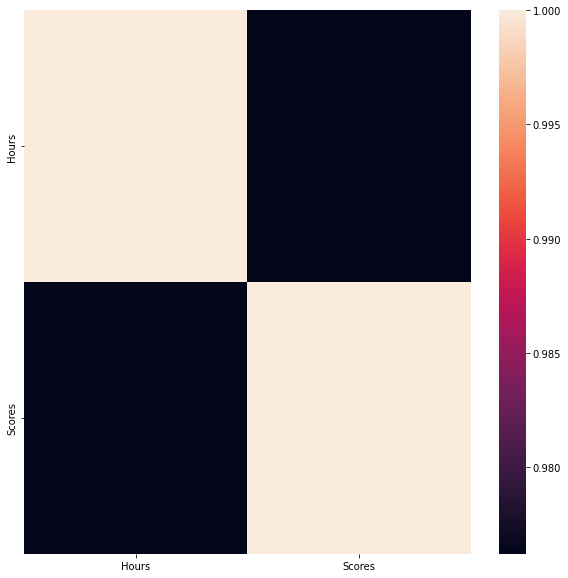

In [45]:
corr = df.corr()
plt.figure(figsize = (10 ,10))
sns.heatmap(corr)
plt.show()

## Fitting the model using stats models

In [46]:
X = df['Hours']
Y = df['Scores']
model = sm.OLS(Y ,X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Scores   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              2579.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):                    6.10e-26
Time:                        22:03:18   Log-Likelihood:                         -78.026
No. Observations:                  25   AIC:                                      158.1
Df Residuals:                      24   BIC:                                      159.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

* We see that the R-squared value is pretty high which indicates the almost all the variability in the values are described using this model with tha parameter of Hours with (10.1743)

In [47]:
predictions = model.predict(X)

In [48]:
df_results = pd.DataFrame({'Actual' : Y ,'Predicted' : predictions})

## Comparing the predicted and the actual values

In [49]:
df_results.head(10)

,Actual,Predicted
0,21,25.435643
1,47,51.888711
2,27,32.557623
3,75,86.481185
4,30,35.609900
5,20,15.261386
6,88,93.603165
7,60,55.958414
8,81,84.446334
9,25,27.470494


## Plotting the line which is representative about our model against the actual values 

Text(0.5, 1.0, 'Linear Regression')

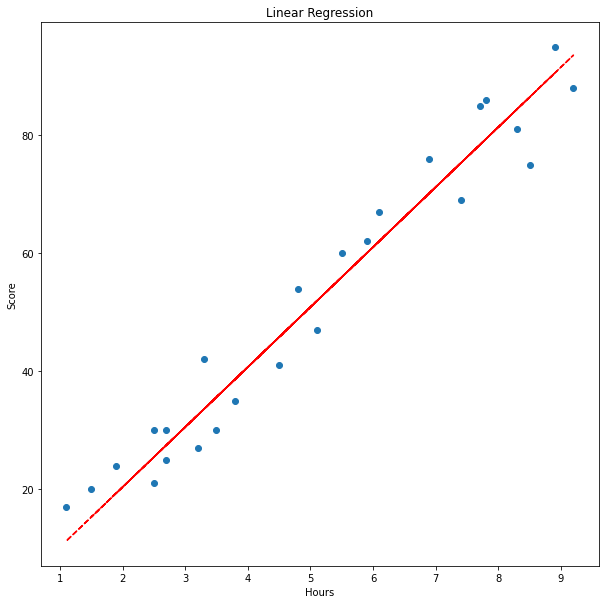

In [50]:
plt.figure(figsize = (10 ,10))
line = np.arange(predictions.min() ,predictions.max())
plt.scatter(X ,Y)
plt.plot(X ,10.1743*X ,color = 'red' ,linestyle = '--')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Linear Regression')

# Q : What will be predicted score for a student who is studying 9.25 hours / day ?

* So, given that our slope from our model is (10.1743)
* We expect that every student with specific number of studying satisfies this model (10.1743 * no! of hours)

In [51]:
test1 = 9.25 * 10.1743
test2 = model.predict(9.25)
print(round(test1,2))
print(round(float(test2) ,2))

94.11
94.11


## So the answer is (94.11)